In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Acquire the datasets.

In [2]:
CVC_data = pd.read_csv('mill.csv')

In [4]:
CVC_data.describe()

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,167.000000,167.000000,146.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000
mean,8.329341,7.167665,0.337603,26.113772,1.032934,0.372754,1.347305,-0.164495,1.336546e+00,7.948459e-02,0.285652,1.004229e-01,0.123872
std,4.764886,4.969367,0.260528,23.292643,0.364616,0.125356,0.477546,0.357721,1.893880e-01,3.654218e-02,0.030758,2.469953e-02,0.021194
min,1.000000,1.000000,0.000000,0.000000,0.750000,0.250000,1.000000,-0.798340,2.084677e-33,1.054677e-08,0.000003,4.074626e-11,0.000003
25%,3.000000,3.000000,0.150000,7.500000,0.750000,0.250000,1.000000,-0.551758,1.350098e+00,6.103516e-02,0.274658,9.277344e-02,0.110474
50%,10.000000,6.000000,0.285000,19.000000,0.750000,0.250000,1.000000,-0.156250,1.372070e+00,6.835938e-02,0.284424,1.019287e-01,0.122070
75%,12.000000,10.000000,0.467500,39.000000,1.500000,0.500000,2.000000,0.206299,1.391602e+00,8.300781e-02,0.297852,1.147461e-01,0.136414
max,16.000000,23.000000,1.530000,105.000000,1.500000,0.500000,2.000000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


In [19]:
columns = list(CVC_data)

for i in columns:

    boolean = pd.isnull(CVC_data[i])
    missing_count = boolean.sum()
    filtered_data = CVC_data[boolean]

    print("Count of missing values in " + i + " is: " + str(missing_count))

Count of missing values in Unnamed: 0 is: 0
Count of missing values in case is: 0
Count of missing values in run is: 0
Count of missing values in VB is: 21
Count of missing values in time is: 0
Count of missing values in DOC is: 0
Count of missing values in feed is: 0
Count of missing values in material is: 0
Count of missing values in smcAC is: 0
Count of missing values in smcDC is: 0
Count of missing values in vib_table is: 0
Count of missing values in vib_spindle is: 0
Count of missing values in AE_table is: 0
Count of missing values in AE_spindle is: 0


In [5]:
CVC_matrix = np.genfromtxt('mill.csv', delimiter=',')
CVC_matrix = np.delete(CVC_matrix, 0, 0)
CVC_matrix = np.delete(CVC_matrix, [0, 1], 1)
CVC_matrix = np.nan_to_num(CVC_matrix) #Changing null values to 0 will undoubtedly cause problems.
print(CVC_matrix)

[[1.         0.         2.         ... 0.31494141 0.08728027 0.10375977]
 [2.         0.         4.         ... 0.30151367 0.08666992 0.0994873 ]
 [3.         0.         6.         ... 0.29541016 0.09277344 0.10498047]
 ...
 [4.         0.         4.         ... 0.29052734 0.10131836 0.11779785]
 [5.         0.4        6.         ... 0.28930664 0.09887695 0.11474609]
 [6.         0.62       9.         ... 0.29296875 0.07568359 0.08300781]]


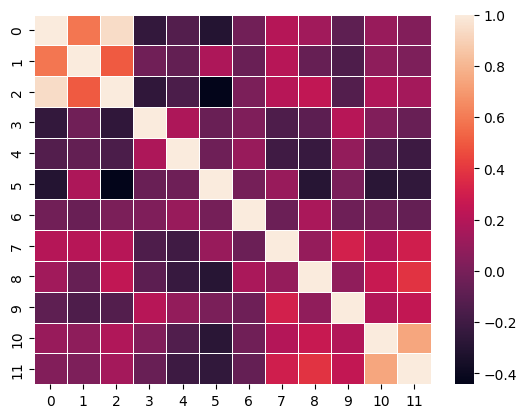

In [7]:
CVC_matrix_cov = np.corrcoef(CVC_matrix.T)
ax = sns.heatmap(CVC_matrix_cov, linewidth=0.5)

plt.show()

time


Text(0.5, 0, 'Time')

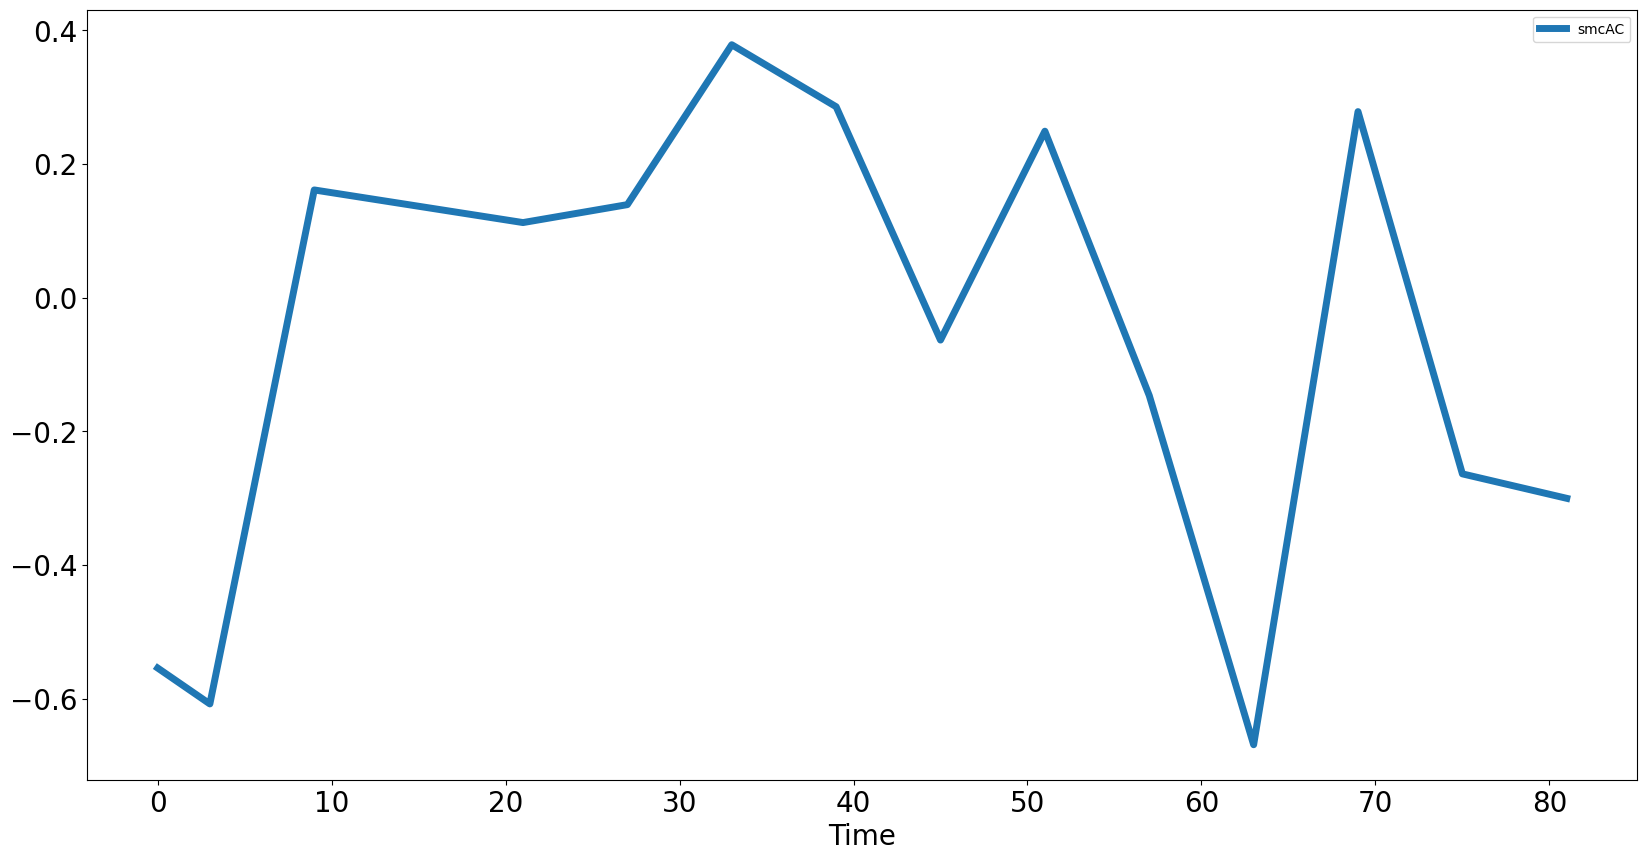

In [86]:
smcAC = CVC_data.loc[CVC_data['case'] == 3, ['time', 'smcAC']]

print(smcAC.columns[0])

smcAC.plot(x=smcAC.columns[0], y=smcAC.columns[1], figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

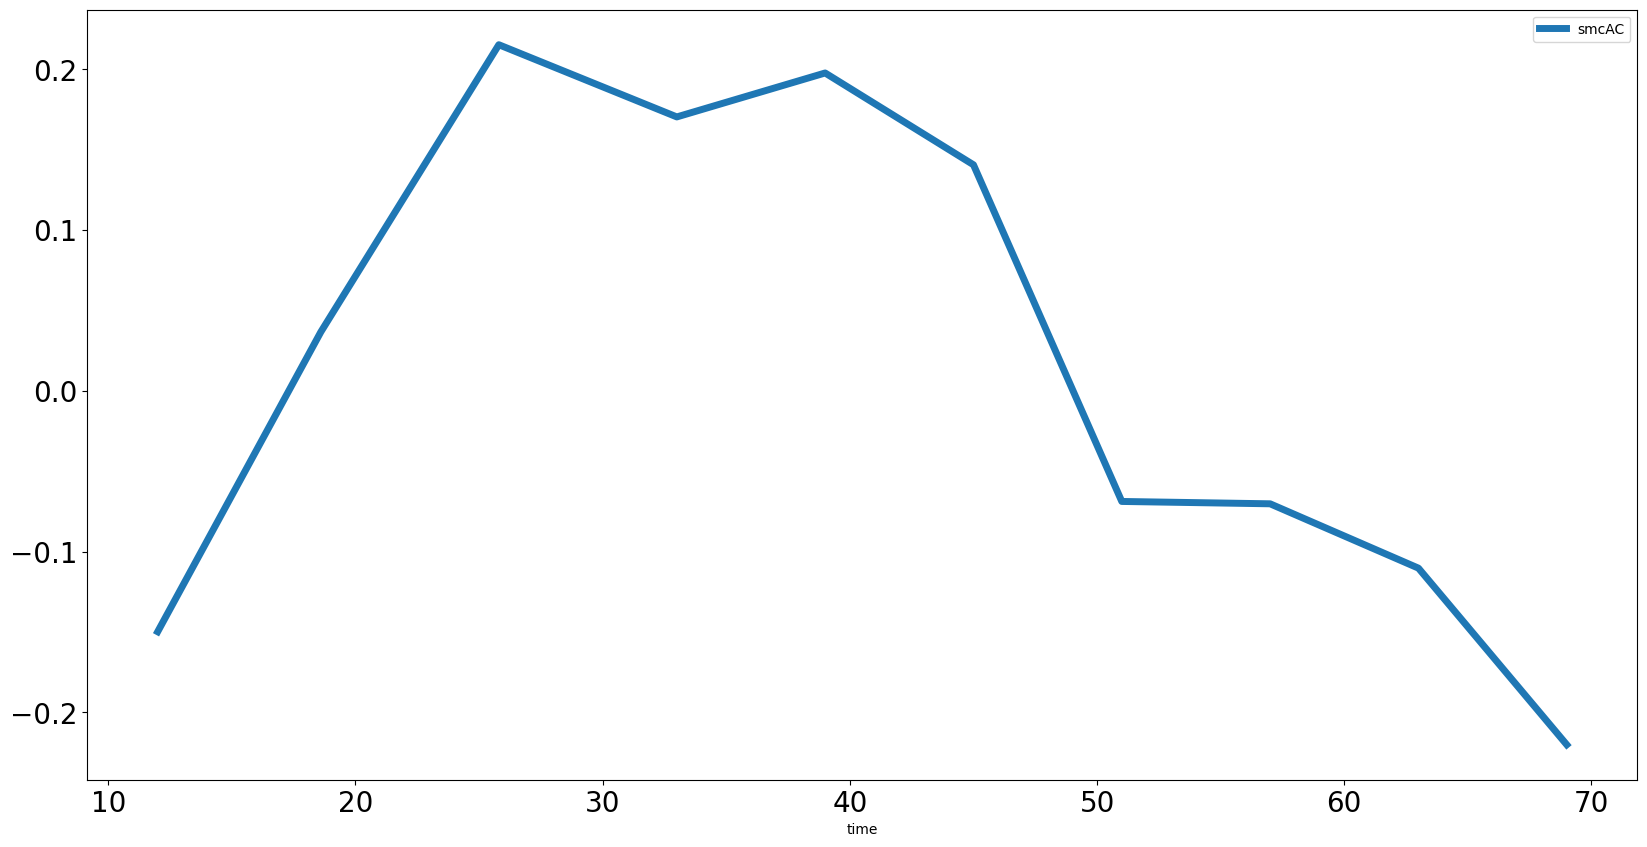

In [87]:
smcAC.rolling(5).mean().plot(x=smcAC.columns[0], figsize=(20,10), linewidth=5, fontsize=20, label="Moving average")
pd.Series(smcAC).ewm(alpha=0.1).mean().plot(x=smcAC.columns[0], figsize=(20,10), linewidth=5, fontsize=20, label="Exponential smoothing")
smcAC.plot(x=smcAC.columns[0], y=smcAC.columns[1], figsize=(20,10), linewidth=5, fontsize=20)
plt.legend()
plt.xlabel('Time', fontsize=20)

Text(0.5, 0, 'Time')

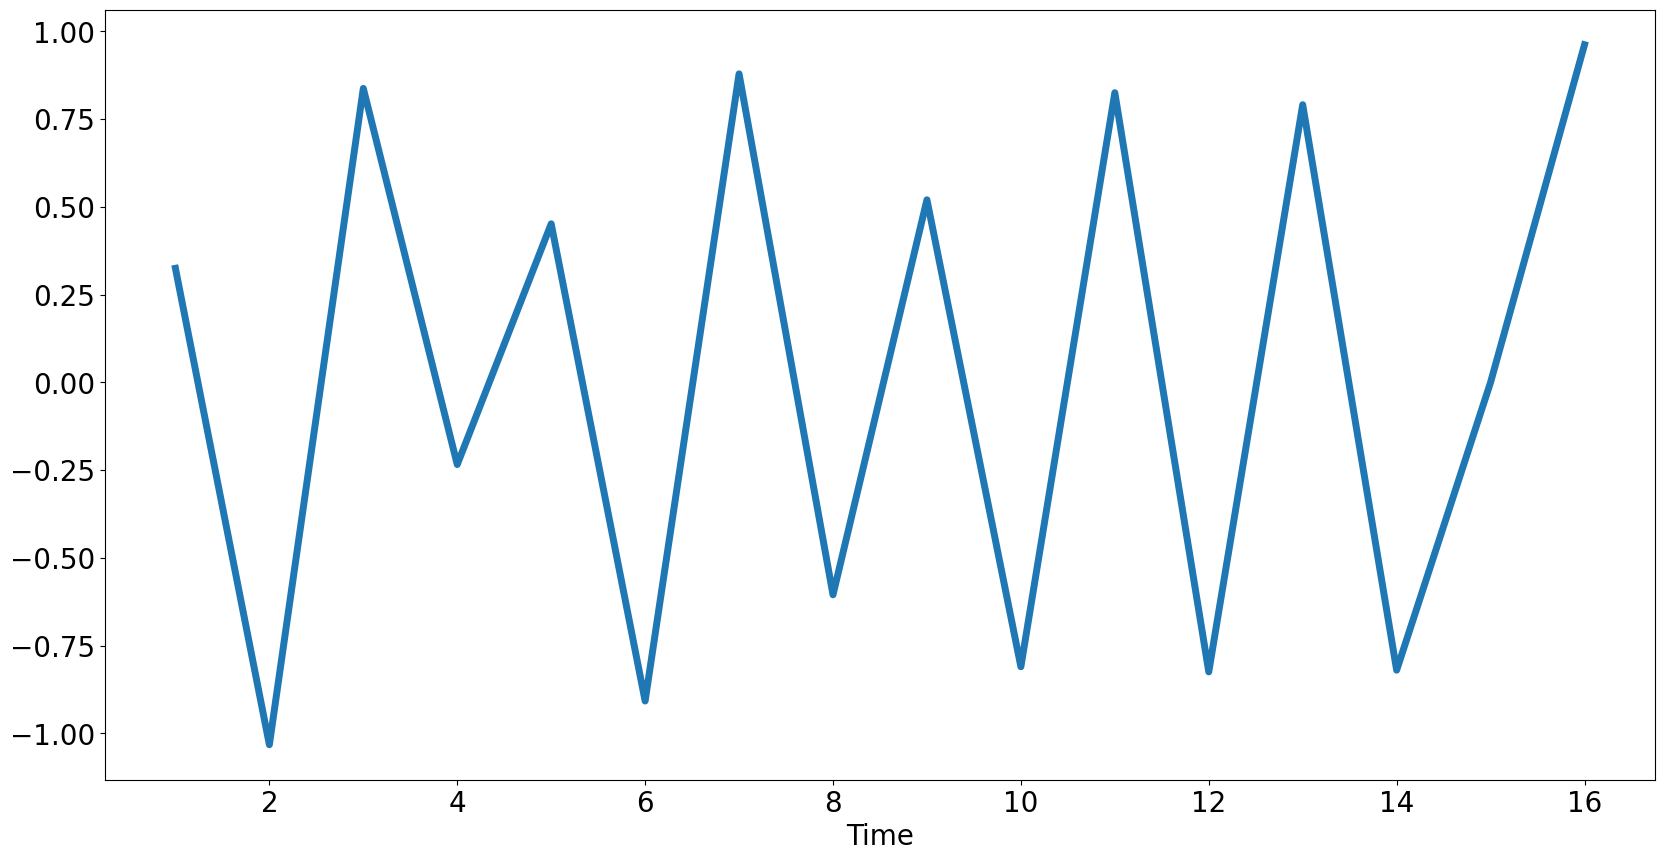

In [19]:
smcAC.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(smcAC.to_frame())

#result = seasonal_decompose(smcAC.to_frame(), model="additive")

#print(result.trend)

       smcAC
31 -0.554199
32 -0.607910
33  0.161133
34  0.112305
35  0.139160
36  0.378418
37  0.285645
38 -0.063477
39  0.249023
40 -0.146484
41 -0.668945
42  0.278320
43 -0.263672
44 -0.300293
